<a href="https://colab.research.google.com/github/yash17525/credit-card-fraud-detection/blob/master/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yash2451","key":"6473a203f3677f956592abb9de70356b"}'}

In [0]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Sep 28 07:15 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                       2MB  2019-08-12 16:24:45          20640  
lakshyaag/india-trade-data                                India - Trade Data                                   1MB  2019-08-16 16:13:58          10240  
dareenalharthi/jamalon-arabic-books-dataset               Jamalon Arabic Books Dataset                         1MB  2019-08-15 18:58:06            564  
rajeevw/ufcdata                                           UFC-Fight historical data from 1993 to 2019          2MB  2019-07-05 09:58:02            379  
therohk/ireland-historical-news                           The Irish Times - Waxy-W

In [0]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:00<00:00, 55.9MB/s]
100% 66.0M/66.0M [00:00<00:00, 96.7MB/s]


In [0]:
!head ~/.kaggle/datasets/mlg-ulb/creditcardfraud/creditcardfraud.csv

head: cannot open '/root/.kaggle/datasets/mlg-ulb/creditcardfraud/creditcardfraud.csv' for reading: No such file or directory


In [0]:
!mkdir creditCardFraud

In [0]:
!unzip creditcardfraud.zip -d creditCardFraud/

Archive:  creditcardfraud.zip
  inflating: creditCardFraud/creditcard.csv  


In [0]:
!rm -r creditcardfraud.zip

In [0]:
!ls

creditCardFraud  kaggle.json


In [0]:
data = pd.read_csv('creditCardFraud/creditcard.csv')

In [0]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
data.shape

(284807, 31)

In [0]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [0]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Balance Dataset

In [0]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [0]:
non_fraud.shape,fraud.shape

((284315, 31), (492, 31))

In [0]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [0]:
data = fraud.append(non_fraud,ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
5,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,5.664395,-9.854485,-0.306167,-10.691196,-0.638498,-2.041974,-1.129056,0.116453,-1.934666,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,6.754625,-8.948179,0.702725,-10.733854,-1.379520,-1.638960,-1.746350,0.776744,-1.327357,0.587743,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
7,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,-5.134454,4.560720,-8.873748,-0.797484,-9.177166,-0.257025,-0.871688,1.313014,0.773914,-2.370599,0.269773,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
8,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,-4.959493,6.439053,-7.520117,0.386352,-9.252307,-1.365188,-0.502362,0.784427,1.494305,-1.808012,0.388307,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
9,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,5.588724,-7.148243,1.680451,-6.210258,0.495282,-3.599540,-4.830324,-0.649090,2.250123,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [0]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [0]:
X = data.drop('Class',axis=1)
y = data['Class']

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0 ,stratify = y)

In [0]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [0]:
x_train.shape

(787, 30)

In [0]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [0]:
x_test

array([[[-0.96554226],
        [-0.21076469],
        [-1.74616018],
        ...,
        [-0.02881066],
        [ 1.29417667],
        [ 6.01043649]],

       [[-0.3493805 ],
        [ 0.34632323],
        [-0.18343518],
        ...,
        [ 0.64889242],
        [ 0.97975093],
        [ 0.54206421]],

       [[-0.95346352],
        [-0.61667315],
        [ 0.7171968 ],
        ...,
        [ 1.62487312],
        [ 0.77680937],
        [-0.41179659]],

       ...,

       [[ 1.16311534],
        [ 0.3671996 ],
        [-0.35110918],
        ...,
        [ 0.01451071],
        [-0.37112909],
        [-0.34863554]],

       [[ 1.09350588],
        [-0.27359333],
        [-0.80811502],
        ...,
        [ 0.75293618],
        [ 1.4559692 ],
        [-0.39890658]],

       [[ 1.41033235],
        [ 0.14292761],
        [-1.39634834],
        ...,
        [ 0.06224463],
        [ 1.02132018],
        [ 6.03161907]]])

In [0]:
x_train.shape,x_test.shape

((787, 30, 1), (197, 30, 1))

## Build CNN

In [0]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from tensorflow.keras.optimizers import Adam

In [0]:
epoch = 20
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [0]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test), verbose=1)

Train on 787 samples, validate on 197 samples
Epoch 1/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.6425 - acc: 0.7281 - val_loss: 0.6013 - val_acc: 0.8883
Epoch 2/20
787/787 [==============================] - 0s 275us/sample - loss: 0.3924 - acc: 0.8564 - val_loss: 0.5618 - val_acc: 0.9036
Epoch 3/20
787/787 [==============================] - 0s 258us/sample - loss: 0.3590 - acc: 0.8793 - val_loss: 0.5268 - val_acc: 0.9086
Epoch 4/20
787/787 [==============================] - 0s 268us/sample - loss: 0.3265 - acc: 0.8856 - val_loss: 0.5016 - val_acc: 0.9086
Epoch 5/20
787/787 [==============================] - 0s 287us/sample - loss: 0.3233 - acc: 0.8780 - val_loss: 0.4736 - val_acc: 0.9188
Epoch 6/20
787/787 [==============================] - 0s 267us/sample - loss: 0.2895 - acc: 0.8996 - val_loss: 0.4390 - val_acc: 0.9137
Epoch 7/20
787/787 [==============================] - 0s 285us/sample - loss: 0.2459 - acc: 0.9098 - val_loss: 0.4245 - val_acc: 0.9086
Epoc

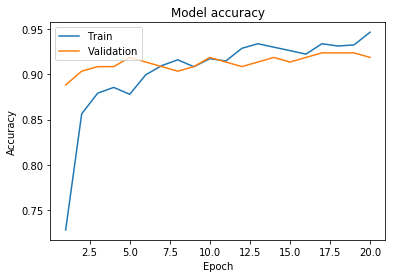

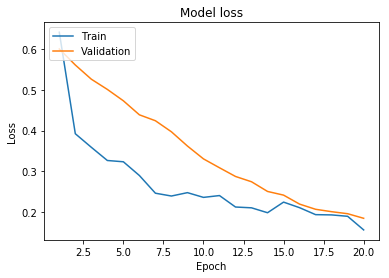

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range,history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

plot_learningCurve(history,epoch)